In [2]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [3]:
dp = '/home/ebert/jupyter-notebooks/FNode-data'
exp_name = '2017_12_03_17_13_53_f2-retention-test'
exp_date = '_'.join(exp_name.split('_')[:3])
experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
cuts = [[30],[2]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
ret = q.generate_thresholds()
q.set_thresholds(cuts)

name 'fort_exp' is not defined


/home/ebert/jupyter-notebooks/FNode/analyses/qdp/QDP/qdp.py:33: RuntimeWarning: divide by zero encountered in divide
  return A0*np.exp(-(x-m0)**2 / (2*s0**2))/np.sqrt(2*np.pi*s0**2) + A1*np.exp(-(x-m1)**2 / (2*s1**2))/np.sqrt(2*np.pi*s1**2)
/home/ebert/jupyter-notebooks/FNode/analyses/qdp/QDP/qdp.py:33: RuntimeWarning: invalid value encountered in divide
  return A0*np.exp(-(x-m0)**2 / (2*s0**2))/np.sqrt(2*np.pi*s0**2) + A1*np.exp(-(x-m1)**2 / (2*s1**2))/np.sqrt(2*np.pi*s1**2)
/usr/local/lib/python2.7/dist-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/ebert/jupyter-notebooks/FNode/analyses/qdp/QDP/qdp.py:29: RuntimeWarning: invalid value encountered in double_scalars
  return 1/(1+A0*s0*(1+special.erf(m0/np.sqrt(2)/s0))/A1/s1/(1+special.erf(m1/np.sqrt(2)/s1)))


In [4]:
q.experiments[0]['variable_list']
try:
    xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
except IndexError:
    xlab = 'iteration'

In [5]:
retention = q.apply_thresholds()

In [6]:
tbl_str = "ivar:\t{0:.2f}\tretention:{1:.3f} +- {2:.3f}"
for i in range(len(retention['retention'].flatten())):
    print(tbl_str.format(
        retention['ivar'].flatten()[i],
        retention['retention'].flatten()[i],
        retention['error'].flatten()[i]
    ))

ivar:	0.00	retention:0.952 +- 0.008
ivar:	0.00	retention:0.960 +- 0.007


In [7]:
q.save_experiment_data()

<IPython.core.display.Javascript object>


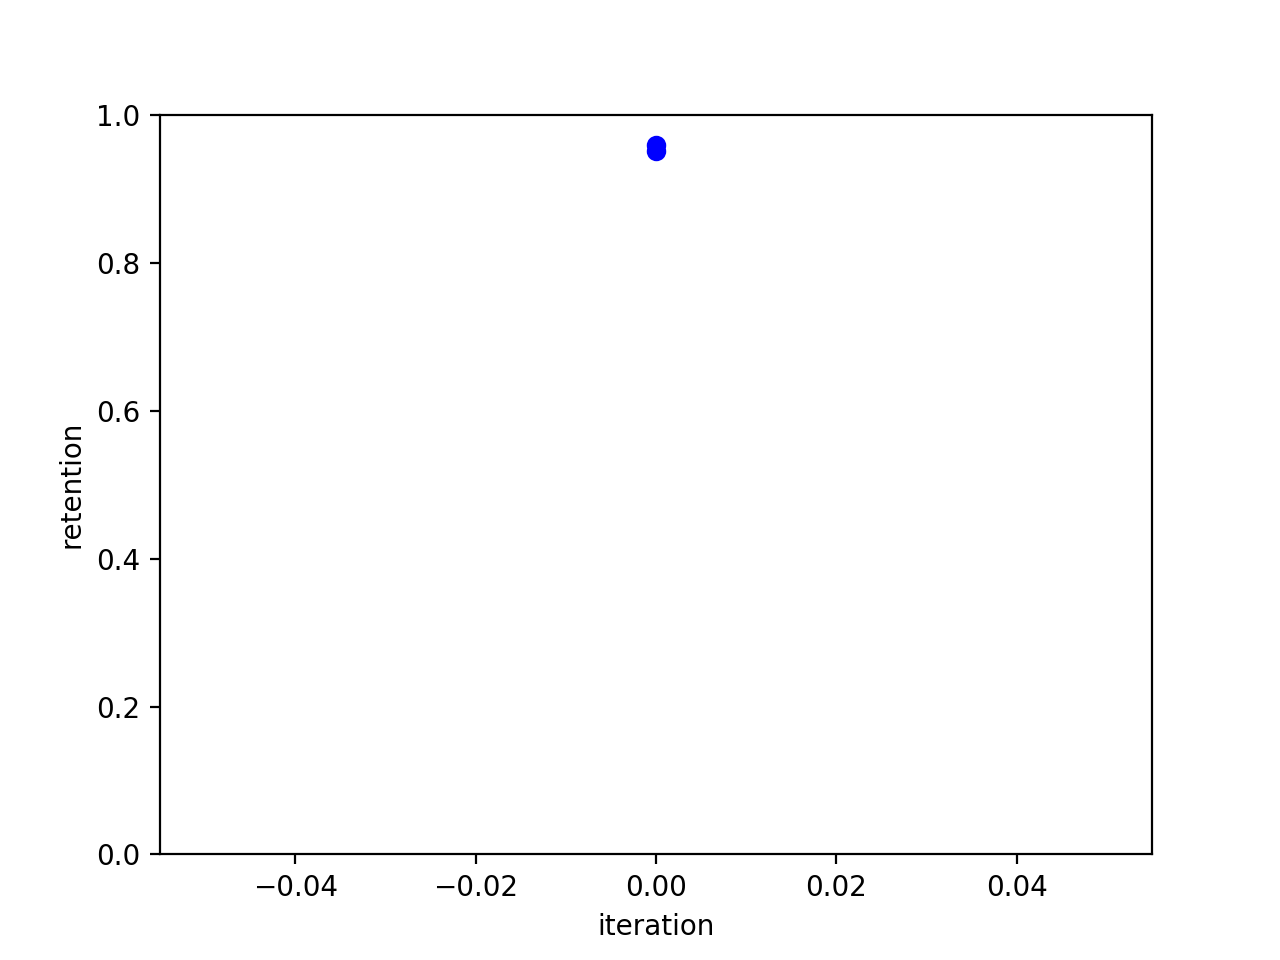

Text(0,0.5,u'retention')

In [8]:
fig, ax = plt.subplots()
for e in range(len(retention['ivar'])):
    ax.errorbar(retention['ivar'][e], retention['retention'][e],
                yerr=retention['error'][e],
                fmt = 'bo'
    )
ax.set_ylim(0, 1)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')

<IPython.core.display.Javascript object>


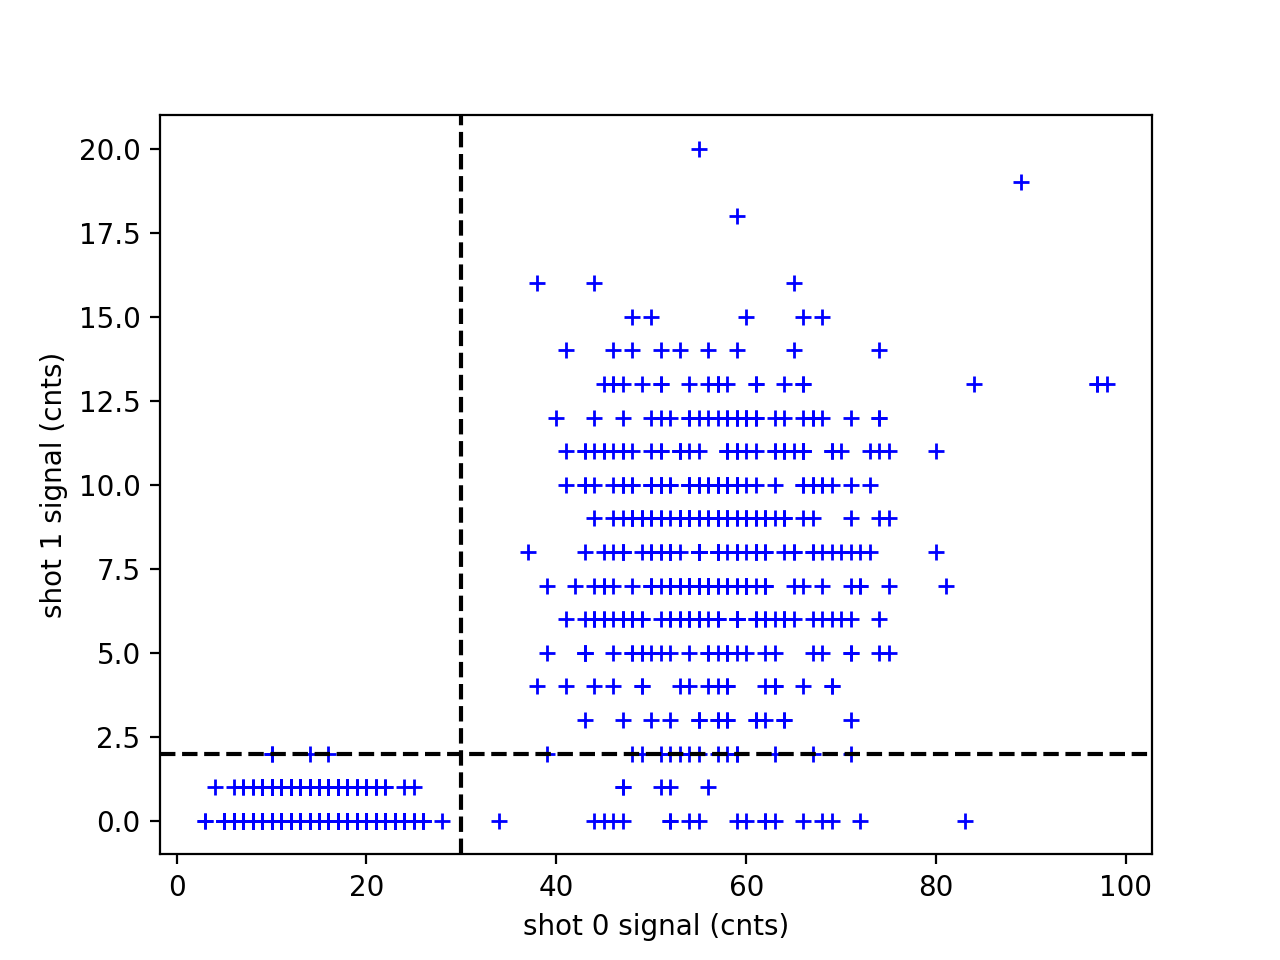

Text(0,0.5,u'shot 1 signal (cnts)')

In [9]:
itr = 0*(len(retention['ivar'][e])-1)
fig, ax = plt.subplots()
s0_data = q.experiments[0]['iterations'][itr]['signal_data'][:,0]
s1_data = q.experiments[0]['iterations'][itr]['signal_data'][:,1]
ax.plot(s0_data, s1_data, 'b+')

for xc in cuts[0]:
    plt.axvline(x=xc, color='k', linestyle='--')
for xc in cuts[1]:
    plt.axhline(y=xc, color='k', linestyle='--')

ax.set_xlabel('shot 0 signal (cnts)')
ax.set_ylabel('shot 1 signal (cnts)')

In [10]:
meas = q.experiments[0]['iterations'][0]['quantized_data']
lost = []
for m, qd in enumerate(meas):
    if qd[0] and not qd[1]:
        lost.append(m)

<IPython.core.display.Javascript object>


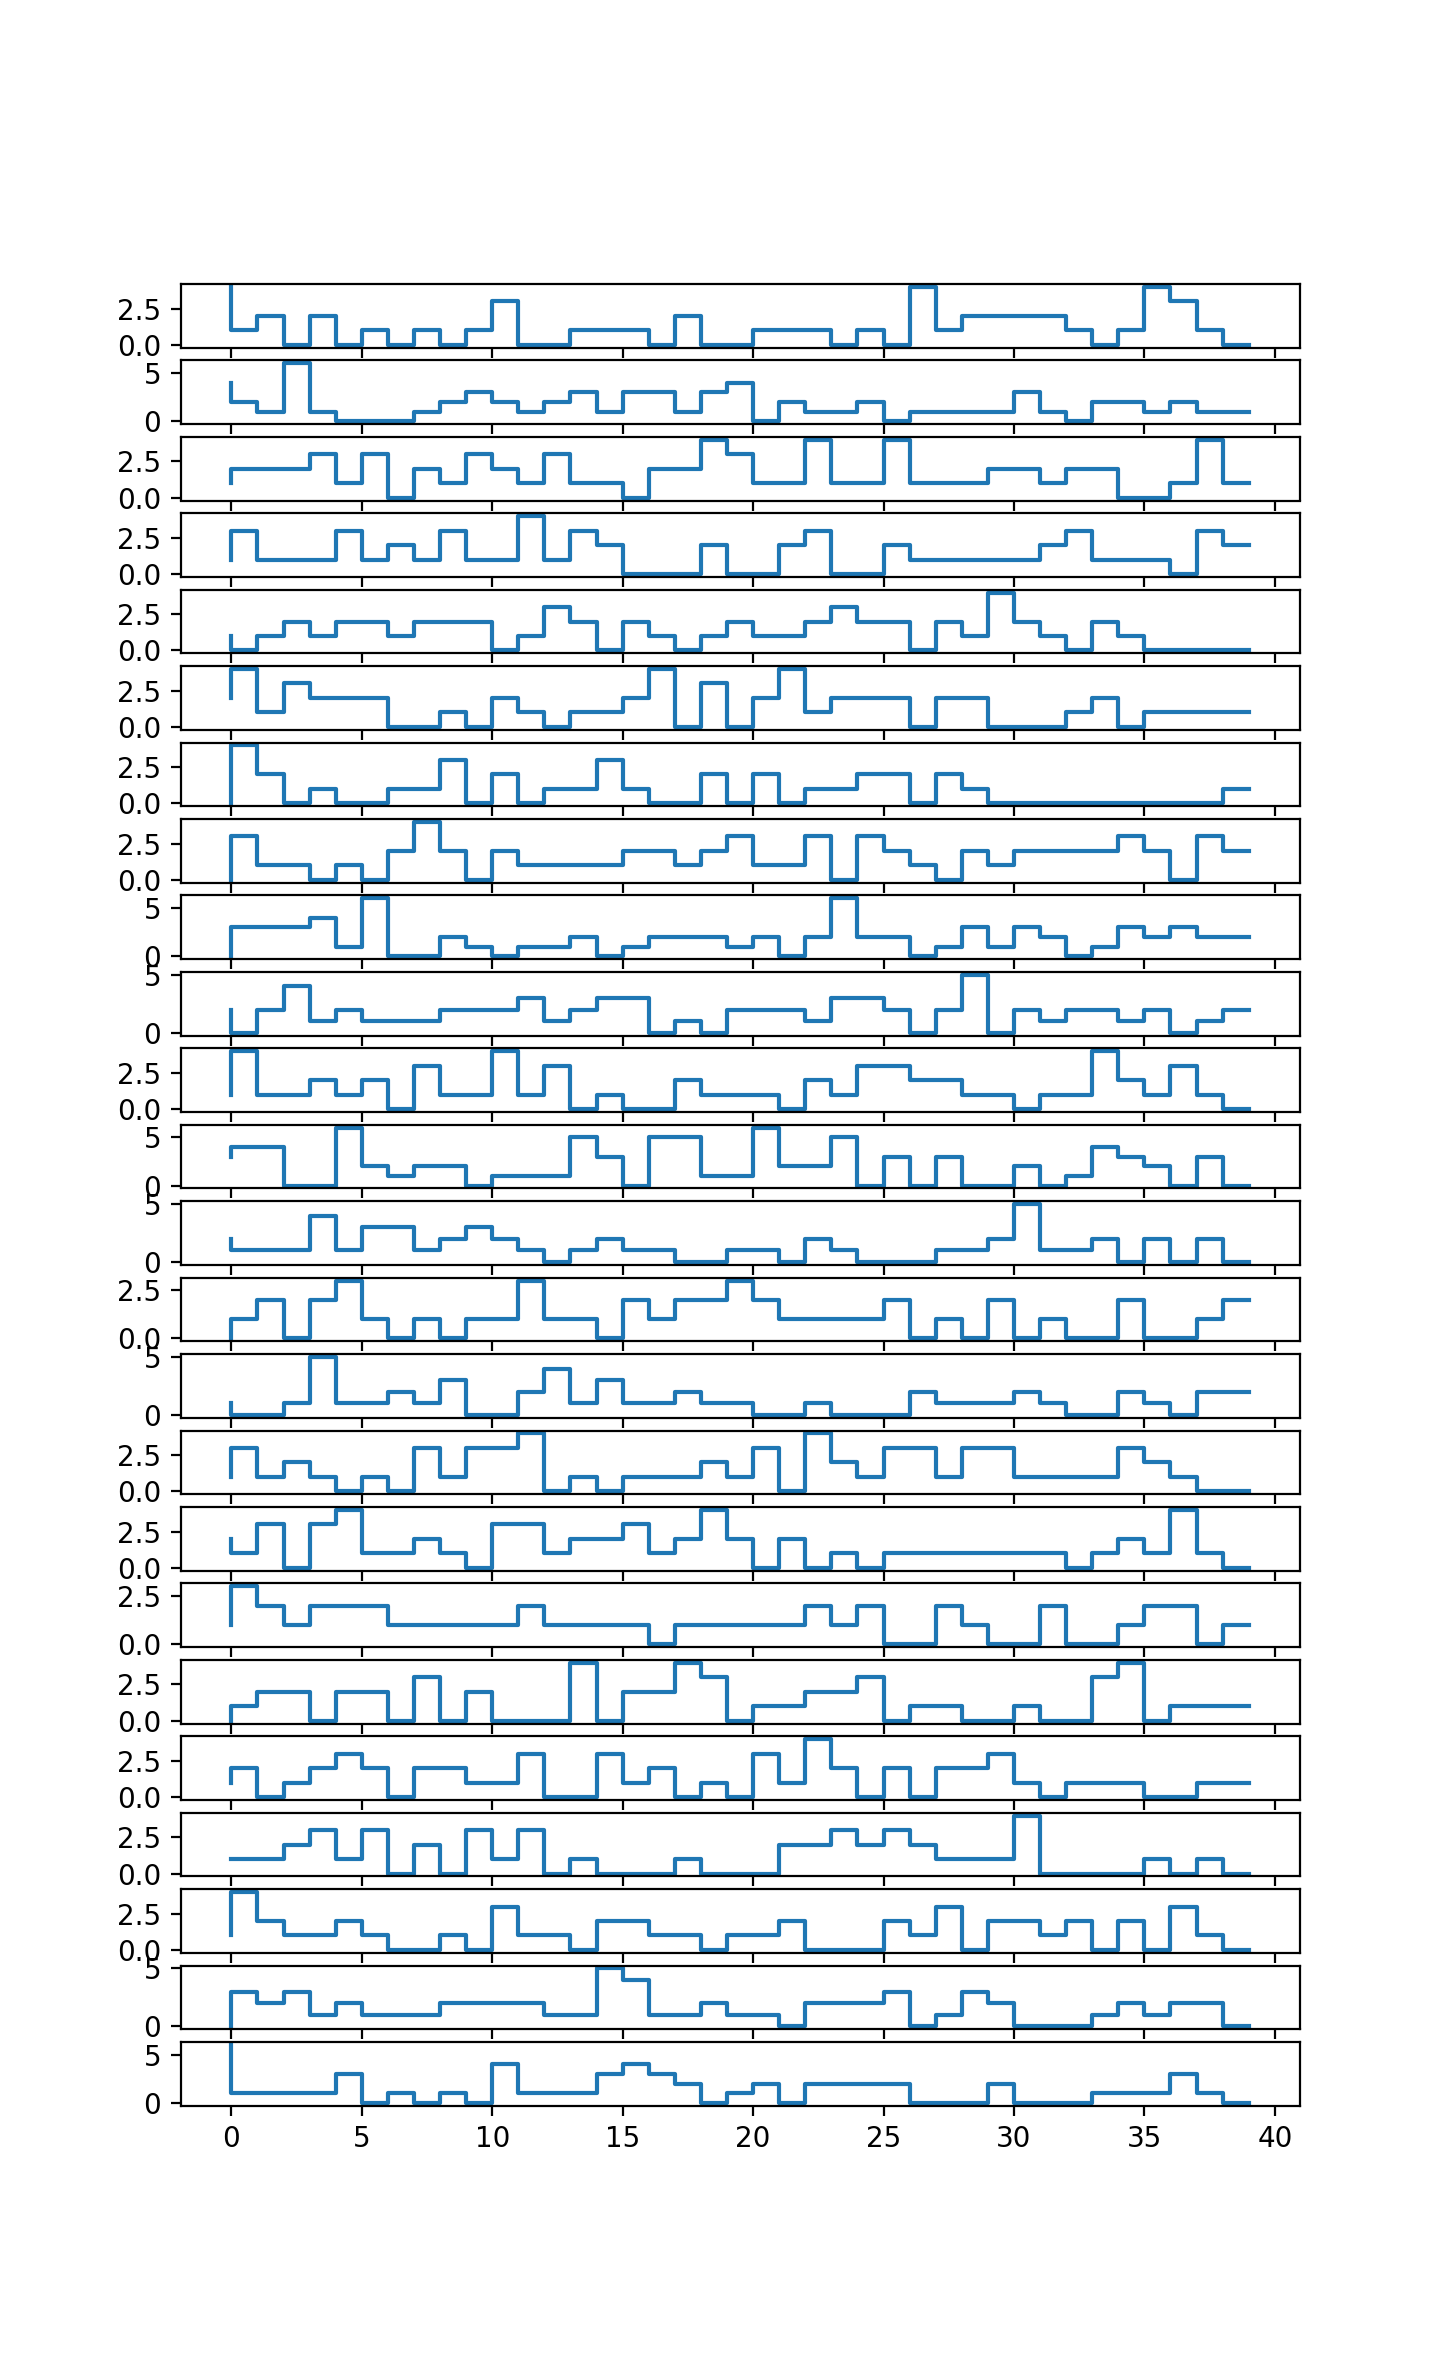

20.0|27.0 = 47.0
39.0|27.0 = 66.0
36.0|33.0 = 69.0
31.0|25.0 = 56.0
26.0|26.0 = 52.0
31.0|24.0 = 55.0
22.0|12.0 = 34.0
27.0|35.0 = 62.0
34.0|38.0 = 72.0
33.0|35.0 = 68.0
29.0|30.0 = 59.0
46.0|37.0 = 83.0
30.0|22.0 = 52.0
24.0|20.0 = 44.0
30.0|17.0 = 47.0
29.0|34.0 = 63.0
39.0|21.0 = 60.0
26.0|19.0 = 45.0
29.0|22.0 = 51.0
27.0|25.0 = 52.0
23.0|23.0 = 46.0
24.0|23.0 = 47.0
37.0|25.0 = 62.0
34.0|20.0 = 54.0


In [11]:
fig, ax = plt.subplots(len(lost), sharex=True)
for i, l in enumerate(lost):
    ax[i].step(range(40), q.experiments[0]['iterations'][0]['timeseries_data'][l,0])
    print("{}|{} = {}".format(
        np.sum(q.experiments[0]['iterations'][0]['timeseries_data'][l,0,:20]),
        np.sum(q.experiments[0]['iterations'][0]['timeseries_data'][l,0,-20:]),
        np.sum(q.experiments[0]['iterations'][0]['timeseries_data'][l,0])
    ))

In [99]:
print lost

[40, 71, 72, 82, 331, 422, 453, 491, 508, 725, 767, 769, 831, 1037]


In [12]:
s0 = 0.08883248
s1 = 7.99600 - s0
s2 = s1*2

In [13]:
s2

15.814335040000001

In [14]:
s0 + s1 + 2*np.sqrt(s0+s1)

13.651439859109104

In [103]:
s0 + s1 + 2*ret[0]['fit_params'][5]

54.613572861227141

In [18]:
## bright state liklihood
measurements, shots, bins = q.experiments[0]['iterations'][0]['timeseries_data'].shape
pbs = np.zeros(measurements)
pds = np.zeros(measurements)
i = 0
mu_b = (s0+s1)/bins  # mean bright signal per bin
mu_d = s0/bins  # mean dark signal per bin
for k in np.nditer(q.experiments[0]['iterations'][0]['timeseries_data'][:,1], flags=['external_loop']):
    pbs[i] = np.product(poisson.pmf(k, mu_b))
    pds[i] = np.product(poisson.pmf(k, mu_d))
    i += 1

In [19]:
loading_time_resolved = pbs > pds

In [21]:
np.sum(np.logical_xor(q.experiments[0]['iterations'][0]['quantized_data'][:,1], loading_time_resolved))

0

In [22]:
loading_time_resolved[:20]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False], dtype=bool)

In [23]:
## bright state liklihood, assuming b -> d transition
measurements, shots, bins = q.experiments[0]['iterations'][0]['timeseries_data'].shape
atm_state = np.zeros(measurements, dtype='bool')
cps = np.zeros(measurements, dtype='int8')
i = 0
mu_b = (s0+s1)/bins  # mean bright signal per bin
mu_d = s0/bins  # mean dark signal per bin
for k in np.nditer(q.experiments[0]['iterations'][0]['timeseries_data'][:,1], flags=['external_loop']):
    lh_b = poisson.pmf(k, mu_b)
    lh_d = poisson.pmf(k, mu_d)
    pib = 0
    cp_max = 0
    for cp in xrange(bins):
        pib_new = np.product(lh_b[:cp])*np.product(lh_d[cp:])
        if pib_new > pib:
            pib = pib_new
            cp_max = cp
    atm_state[i] = cp_max != 0
    cps[i] = cp_max
    i += 1

In [24]:
np.sum(atm_state)

559

In [25]:
np.sum(loading_time_resolved)

481

In [32]:
np.sum(q.experiments[0]['iterations'][0]['quantized_data'][:,1])

481.0

In [27]:
np.sum(np.logical_and(atm_state,loading_time_resolved))

481

<IPython.core.display.Javascript object>


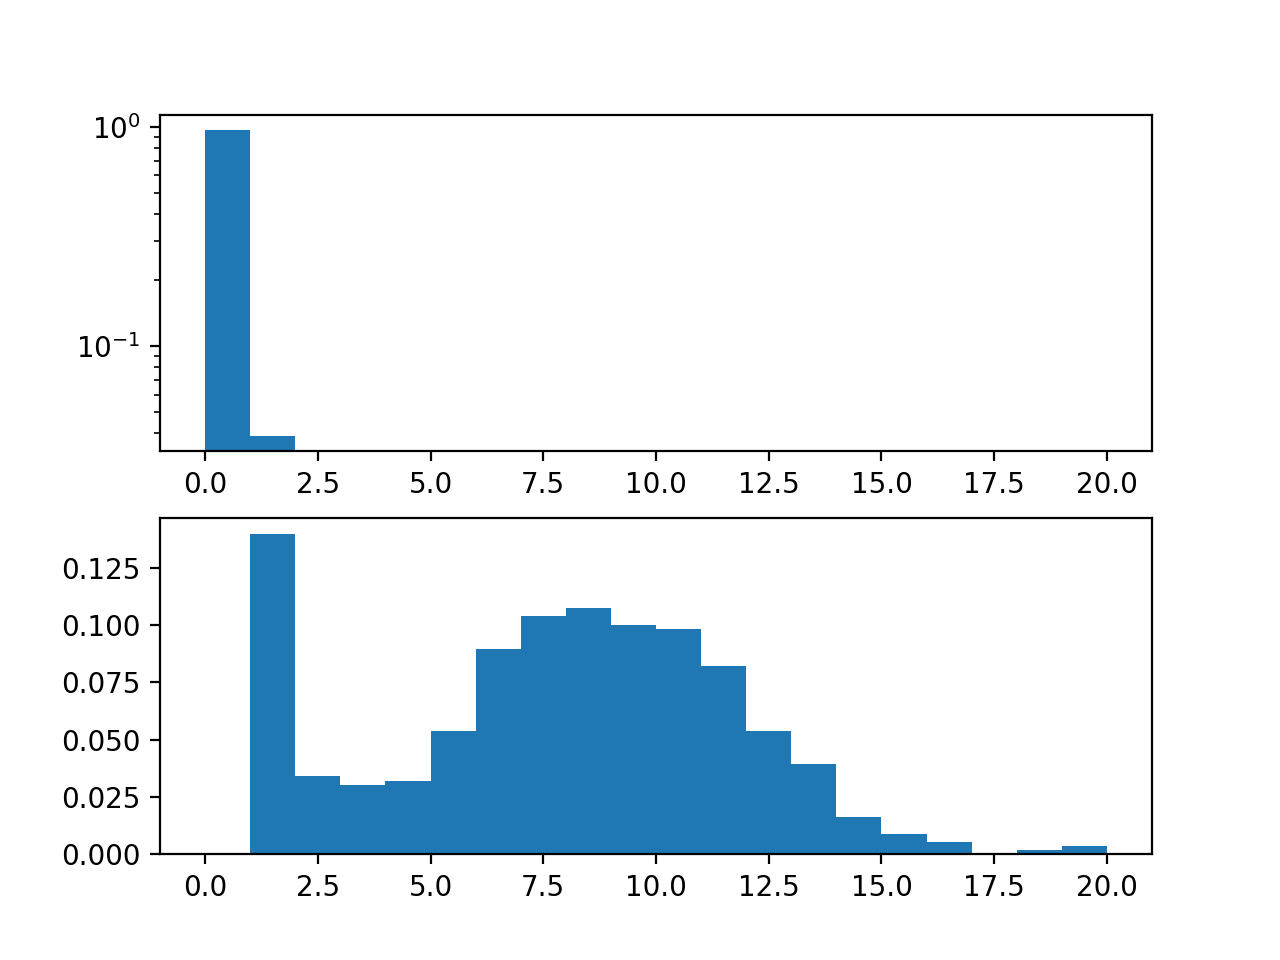

In [28]:
s1_cut = q.experiments[0]['iterations'][0]['signal_data'][atm_state,1]
s1_nocut = q.experiments[0]['iterations'][0]['signal_data'][np.logical_not(atm_state),1]

fig, ax = plt.subplots(2)

ax[0].hist(s1_nocut, bins=np.arange(max(s1_cut)+1), density=True)
ax[0].set_yscale('log', nonposy='clip')
ax[1].hist(s1_cut, bins=np.arange(max(s1_cut)+1), density=True)
s1_sig = np.mean(s1_cut)
s1_bg = np.mean(s1_nocut)

In [30]:
np.sum(np.logical_and(np.logical_not(q.experiments[0]['iterations'][0]['quantized_data'][:,1]), atm_state))

78